#step 1

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


#step 2


In [10]:
class HousingRegressionNN(nn.Module):
    def __init__(self):
        super(HousingRegressionNN, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = HousingRegressionNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#step 3


In [11]:
# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 4.8994
Epoch [20/100], Loss: 3.8235
Epoch [30/100], Loss: 2.6683
Epoch [40/100], Loss: 1.7287
Epoch [50/100], Loss: 1.2175
Epoch [60/100], Loss: 0.9709
Epoch [70/100], Loss: 0.8242
Epoch [80/100], Loss: 0.7603
Epoch [90/100], Loss: 0.7164
Epoch [100/100], Loss: 0.6829


Mean Squared Error: 0.7000, R2 Score: 0.4658


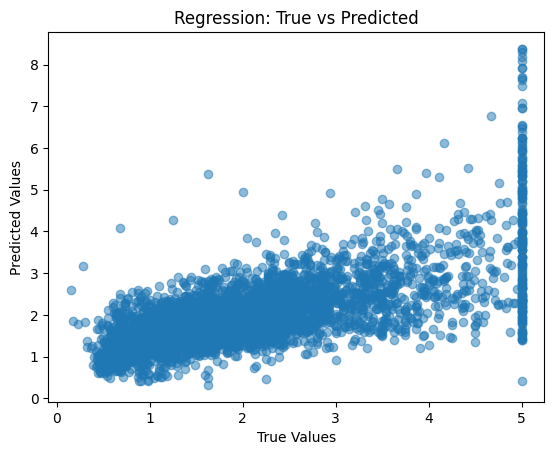

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

# Calculate MSE and R2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse:.4f}, R2 Score: {r2:.4f}')

# Visualization
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression: True vs Predicted")
plt.show()


In [13]:
import numpy as np

median_value = np.median(y)
y_class = (y > median_value).astype(int)  # 1 for high value, 0 for low value

# Split and convert to tensors
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Classification labels
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [14]:
class HousingClassificationNN(nn.Module):
    def __init__(self):
        super(HousingClassificationNN, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output size = 2 for binary classification
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_class = HousingClassificationNN()
criterion_class = nn.CrossEntropyLoss()
optimizer_class = optim.Adam(model_class.parameters(), lr=0.001)


In [15]:
# Train the classification model
epochs = 100
for epoch in range(epochs):
    model_class.train()
    optimizer_class.zero_grad()
    outputs = model_class(X_train_tensor)
    loss = criterion_class(outputs, y_train_tensor)
    loss.backward()
    optimizer_class.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6470
Epoch [20/100], Loss: 0.5998
Epoch [30/100], Loss: 0.5496
Epoch [40/100], Loss: 0.5020
Epoch [50/100], Loss: 0.4631
Epoch [60/100], Loss: 0.4330
Epoch [70/100], Loss: 0.4093
Epoch [80/100], Loss: 0.3907
Epoch [90/100], Loss: 0.3773
Epoch [100/100], Loss: 0.3681


Accuracy: 0.8307, Precision: 0.8367, Recall: 0.8191, F1-score: 0.8278


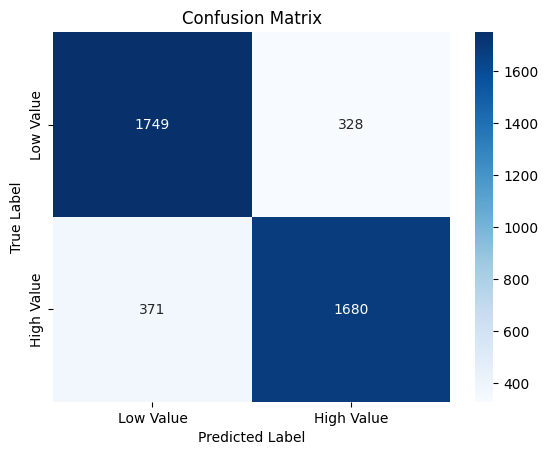

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

model_class.eval()
with torch.no_grad():
    test_outputs = model_class(X_test_tensor)
    predictions_class = torch.argmax(test_outputs, axis=1).numpy()

acc = accuracy_score(y_test, predictions_class)
precision = precision_score(y_test, predictions_class)
recall = recall_score(y_test, predictions_class)
f1 = f1_score(y_test, predictions_class)

print(f'Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, predictions_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Value", "High Value"], yticklabels=["Low Value", "High Value"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
